### Time dependent analysis

In [170]:
# Upload packages
import pandas as pd
from lifelines import KaplanMeierFitter
import math

In [171]:
metadata = pd.read_csv("~/Desktop/hmp2_metadata.csv")
fecalcal_info_MGX = metadata.loc[metadata.data_type == "metagenomics", ["External ID", "Participant ID", "diagnosis", "visit_num", "fecalcal", "fecalcal_ng_ml","sex","date_of_receipt"]]
fecalcal_info_MGX = fecalcal_info_MGX[~fecalcal_info_MGX["External ID"].str.contains("_P")]
fecalcal_info_MGX = fecalcal_info_MGX[~fecalcal_info_MGX["External ID"].str.contains("_TR")]
fc1 = [not math.isnan(x) for x in fecalcal_info_MGX.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_MGX.fecalcal_ng_ml]
fc = [fc1[i] or fc2[i] for i in range(len(fc1))]
fecalcal_info_MGX = fecalcal_info_MGX.loc[fc, :]
fc1 = [not math.isnan(x) for x in fecalcal_info_MGX.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_MGX.fecalcal_ng_ml]
fecalcal_info_MGX.fecalcal = fecalcal_info_MGX.fecalcal.fillna(fecalcal_info_MGX['fecalcal_ng_ml'])
fecalcal_info_MGX.drop(["fecalcal_ng_ml"], inplace=True, axis=1)
fecalcal_info_MGX.to_csv('~/Desktop/select_samples_MGX.csv')

/var/folders/qz/fy7nnm954f76spkqc86w7g_c0000gn/T/ipykernel_25778/541646005.py:1: DtypeWarning: Columns (12,13,14,40,46,55,65,66,67,68,177,294,298,299,300,301,304,305,306,307,308,309,310,318,320,328,330,346,348,350,352,354,359,361,363,366,373,377,381,383,418,419,432,433,434,435,436,438,439,440,441,442,444,445,446,447,448,450,451,452,453,454) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata = pd.read_csv("~/Desktop/hmp2_metadata.csv")


In [172]:
fecalcal_info_MTX= metadata.loc[metadata.data_type == "metatranscriptomics", ["External ID", "Participant ID", "diagnosis", "visit_num", "fecalcal", "fecalcal_ng_ml","sex","date_of_receipt"]]
fecalcal_info_MTX = fecalcal_info_MTX[~fecalcal_info_MTX["External ID"].str.contains("_P")]
fecalcal_info_MTX = fecalcal_info_MTX[~fecalcal_info_MTX["External ID"].str.contains("_TR")]
fc1 = [not math.isnan(x) for x in fecalcal_info_MTX.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_MTX.fecalcal_ng_ml]
fc = [fc1[i] or fc2[i] for i in range(len(fc1))]
fecalcal_info_MTX = fecalcal_info_MTX.loc[fc, :]
fc1 = [not math.isnan(x) for x in fecalcal_info_MTX.fecalcal]
fc2 = [not math.isnan(x) for x in fecalcal_info_MTX.fecalcal_ng_ml]
fecalcal_info_MTX.fecalcal = fecalcal_info_MTX.fecalcal.fillna(fecalcal_info_MTX['fecalcal_ng_ml'])
fecalcal_info_MTX.drop(["fecalcal_ng_ml"], inplace=True, axis=1)
fecalcal_info_MTX

,External ID,Participant ID,diagnosis,visit_num,fecalcal,sex,date_of_receipt
2710,CSM67UA2,C3001,CD,20,23.20350,Female,30/09/2014
2711,CSM79HGP,C3001,CD,26,37.17836,Female,10/12/2014
2715,CSM5MCVN,C3002,CD,13,15.97901,Female,19/08/2014
2716,CSM67UBH,C3002,CD,19,14.51068,Female,28/10/2014
2717,CSM67UBN,C3002,CD,22,16.32450,Female,09/12/2014
...,...,...,...,...,...,...,...
3507,PSMA263W,P6024,CD,25,255.10000,Male,16/12/2015
3520,PSMA264U,P6035,UC,8,17.44622,Male,01/12/2015
3521,PSMA267J,P6035,UC,12,15.50000,Male,19/01/2016
3522,PSMA267P,P6035,UC,15,14.57958,Male,15/03/2016


In [174]:
fecalcal_time = pd.concat([fecalcal_info_MTX, fecalcal_info_MGX])
fecalcal_time.sort_values(by="Participant ID").drop_duplicates()
fecalcal_time["date_of_receipt"] = pd.to_datetime(fecalcal_time["date_of_receipt"])


/var/folders/qz/fy7nnm954f76spkqc86w7g_c0000gn/T/ipykernel_25778/1927362229.py:3: UserWarning: Parsing '30/09/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  fecalcal_time["date_of_receipt"] = pd.to_datetime(fecalcal_time["date_of_receipt"])
/var/folders/qz/fy7nnm954f76spkqc86w7g_c0000gn/T/ipykernel_25778/1927362229.py:3: UserWarning: Parsing '19/08/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  fecalcal_time["date_of_receipt"] = pd.to_datetime(fecalcal_time["date_of_receipt"])
/var/folders/qz/fy7nnm954f76spkqc86w7g_c0000gn/T/ipykernel_25778/1927362229.py:3: UserWarning: Parsing '28/10/2014' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  fecalcal_time["date_of_receipt"] = pd.to_datetime(fecalcal_time["date_of_receipt"])
/var/folders/qz/fy7nnm954f76spkqc86w7g_c0000gn/T/ipykernel_25778/1927362229.py:3: UserWarning: Pa

In [175]:
date_min = min(fecalcal_time["date_of_receipt"])
date_max = max(fecalcal_time["date_of_receipt"])
study_len = date_max - date_min
print(f'Data min: {date_min}')
print(f'Data max: {date_max}')
print(study_len)

Data min: 2013-11-12 00:00:00
Data max: 2016-11-05 00:00:00
1089 days 00:00:00


In [176]:
fecalcal_time.loc[fecalcal_time['fecalcal']<200, 'fecalcal_bin'] = '0'
fecalcal_time.loc[fecalcal_time['fecalcal']>=200, 'fecalcal_bin'] = '1'
fecalcal_time['days_event'] = (fecalcal_time['date_of_receipt'] - date_min)
fecalcal_time['days_event'] = fecalcal_time['days_event'].dt.days
fecalcal_time

,External ID,Participant ID,diagnosis,visit_num,fecalcal,sex,date_of_receipt,fecalcal_bin,days_event
2710,CSM67UA2,C3001,CD,20,23.20350,Female,2014-09-30,0,322
2711,CSM79HGP,C3001,CD,26,37.17836,Female,2014-10-12,0,334
2715,CSM5MCVN,C3002,CD,13,15.97901,Female,2014-08-19,0,280
2716,CSM67UBH,C3002,CD,19,14.51068,Female,2014-10-28,0,350
2717,CSM67UBN,C3002,CD,22,16.32450,Female,2014-09-12,0,304
...,...,...,...,...,...,...,...,...,...
2676,PSMA264Q,P6035,UC,6,63.81772,Male,2015-03-11,0,484
2678,PSMA264U,P6035,UC,8,17.44622,Male,2015-01-12,0,426
2680,PSMA267J,P6035,UC,12,15.50000,Male,2016-01-19,0,798
2681,PSMA267P,P6035,UC,15,14.57958,Male,2016-03-15,0,854


In [177]:
kmf = KaplanMeierFitter()
kmf.fit(fecalcal_time.days_event, fecalcal_time.fecalcal_bin, label='Kaplan Meier Estimate')
kmf.survival_function_

/Users/odedsabah/PycharmProjects/MGX_MTX_Analysis/venv/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


,Kaplan Meier Estimate
timeline,
0.0,0.996269
56.0,0.996269
57.0,0.996269
59.0,0.996269
90.0,0.992502
...,...
918.0,0.242139
935.0,0.242139
994.0,0.242139


<AxesSubplot: xlabel='timeline'>

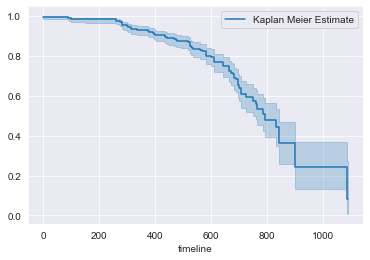

In [178]:
kmf.plot(ci_show=True)


In [179]:
fecalcal_time['sex'] = fecalcal_time['sex'].astype('category')
groups = fecalcal_time['sex']
i1 = (groups == 'Male')  ## males
i2 = (groups == 'Female') ## females

kmf1 = KaplanMeierFitter()
kmf1.fit(fecalcal_time['days_event'][fecalcal_time['sex'] == "Male"], fecalcal_time['fecalcal_bin'][fecalcal_time['sex'] == "Male"], label='Male')

/Users/odedsabah/PycharmProjects/MGX_MTX_Analysis/venv/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"Male", fitted with 291 total observations, 208 right-censored observations>

In [180]:
kmf2 = KaplanMeierFitter()
kmf2.fit(fecalcal_time['days_event'][fecalcal_time['sex'] == 'Female'], fecalcal_time['fecalcal_bin'][fecalcal_time['sex'] == 'Female'], label='Female')

/Users/odedsabah/PycharmProjects/MGX_MTX_Analysis/venv/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"Female", fitted with 245 total observations, 193 right-censored observations>

<AxesSubplot: xlabel='timeline'>

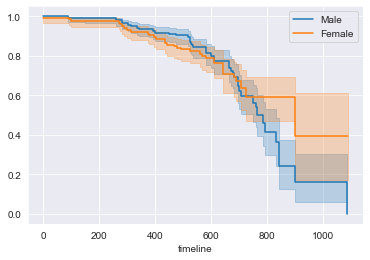

In [181]:
a1 = kmf1.plot()
kmf2.plot(ax=a1)

In [182]:
fecalcal_time['diagnosis'] = fecalcal_time['diagnosis'].astype('category')
groups = fecalcal_time['diagnosis']
i1 = (groups == 'UC')
i2 = (groups == 'CD') ## females
i3 = (groups == 'nonIBD') ## females

kmf1 = KaplanMeierFitter()
kmf1.fit(fecalcal_time['days_event'][fecalcal_time['diagnosis'] == "UC"], fecalcal_time['fecalcal_bin'][fecalcal_time['diagnosis'] == "UC"], label='UC')

/Users/odedsabah/PycharmProjects/MGX_MTX_Analysis/venv/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"UC", fitted with 150 total observations, 94 right-censored observations>

In [183]:
kmf2 = KaplanMeierFitter()
kmf2.fit(fecalcal_time['days_event'][fecalcal_time['diagnosis'] == "CD"], fecalcal_time['fecalcal_bin'][fecalcal_time['diagnosis'] == "CD"], label='CD')

/Users/odedsabah/PycharmProjects/MGX_MTX_Analysis/venv/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"CD", fitted with 228 total observations, 149 right-censored observations>

In [184]:
kmf3 = KaplanMeierFitter()
kmf3.fit(fecalcal_time['days_event'][fecalcal_time['diagnosis'] == "nonIBD"], fecalcal_time['fecalcal_bin'][fecalcal_time['diagnosis'] == "nonIBD"], label='nonIBD')

/Users/odedsabah/PycharmProjects/MGX_MTX_Analysis/venv/lib/python3.8/site-packages/lifelines/utils/__init__.py:1187: UserWarning: Attempting to convert an unexpected datatype 'object' to float. Suggestion: 1) use `lifelines.utils.datetimes_to_durations` to do conversions or 2) manually convert to floats/booleans.
  warnings.warn(warning_text, UserWarning)


<lifelines.KaplanMeierFitter:"nonIBD", fitted with 158 total observations, 158 right-censored observations>

<AxesSubplot: xlabel='timeline'>

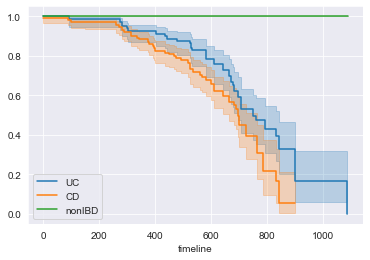

In [185]:
a1 = kmf1.plot()
kmf2.plot(ax=a1)
kmf3.plot(ax=a1)